<a href="https://colab.research.google.com/github/AdamStamm/bootcamp_alura/blob/main/Notebooks/Bootcamp_Data_Science_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apresentação

Esse notebook contempla os códigos aprendidos no **Módulo 2** do Bootcamp Data Science aplicada desenvolvido pela Alura. O foco de aprendizado é **Visualização de Dados com Seaborn e Matplotlib**.

##Importando bibliotecas necessárias para manipulação de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

##Carregando dados

**Os dados estão disponíveis no github da alura através do link:** 
https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados

*Inicialmente será utilizado o mesmo conjunto de dados da aula 2 do módulo 1

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


#Organizando dados conforme módulo anterior para continuidade.

In [3]:
#Pegaremos o índice da média dos dados (que são os nomes de colunas válidas) e salvaremos na variável colunas_usaveis, o método .tolist() transforma os dados em uma lista para
#permitir que esses dados possam ser modificados, isso irá permitir que adicionemos a coluna Unidade da Federação.
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação") #inserindo a coluna "Unidade da Federação" na posição 0.

In [4]:
#agora iremos fatiar (fazer o slicing) do nosso data_frame original selecionando apenas essas colunas
usaveis = dados[colunas_usaveis] #atribuindo tudo a variável usaveis

In [5]:
#Setando a coluna Unidade da Federação como índice principal.
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,9.291297e+08
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,4.206680e+08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1.771655e+09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,268

In [6]:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)
#Organizando conforme a aula, pegando dados a partir de 2008/Fev
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
#ordenado_por_total = ordenado_por_total /1000000
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,2.106115e+08,2.290870e+08,2.215980e+08,2.413999e+08,2.298212e+08,2.507936e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077389e+08,1.031408e+08,1.110660e+08,1.060943e+08,1.154872e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43

In [7]:
o_mes_mais_recente = ordenado_por_total.columns[-1]

In [8]:
gastos_do_mais_recente = ordenado_por_total[o_mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo            2.827096e+08
31 Minas Gerais         1.204672e+08
41 Paraná               8.032085e+07
43 Rio Grande do Sul    7.892970e+07
33 Rio de Janeiro       7.154023e+07
Name: 2020/Jul, dtype: float64

In [9]:
#Mudando a forma de impressão dos dados para que os valores científicos sejam apresentados como números de ponto flutuante para melhor análise
pd.options.display.float_format = "{:.2f}".format

In [10]:
gastos_do_mais_recente = gastos_do_mais_recente/1000000
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

#Início do módulo 2

#Aula 1 - Fontes externas, limpeza e manipulação

Fazendo a análise de gasto proporcional com o total de gastos do país.

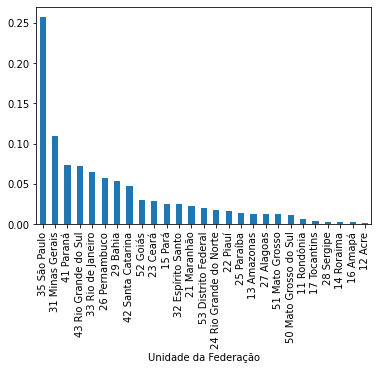

In [11]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

##Carregando a populacão dos estados

Podemos procurar conjuntos de dados tradicionais, como fizemos até agora, para a população brasileira, como por exemplo o site do IBGE etc... Entretanto, para aprendizado iremos obter esses dados de um modo diferente, primeiro veremos abrindo normalmente um arquivo xlsx do excel, e posteriormente a outra maneira.

In [12]:
ibge_estimativa = pd.read_excel('https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls', header=1)
ibge_estimativa.head()

,BRASIL E UNIDADES DA FEDERAÇÃO,Unnamed: 1,POPULAÇÃO ESTIMADA
0,Brasil,nan,211755692
1,Região Norte,nan,18672591
2,Rondônia,nan,1796460
3,Acre,nan,894470
4,Amazonas,nan,4207714


##Lendo arquivos com fluxo de dados usando StringIO.

Agora sim, veremos uma forma totalmente nova de carregar os dados, uma vez que ler excel não é realmente um desafio. Também devemos considerar que dependendo do que buscamos, não temos nem de onde baixar. No exemplo a seguir iremos acessar a população conforme está descrito na página do wikipedia.
Link: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

Primeiro faremos um "copy and paste" da própria página

In [13]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

Importante, para que se mantenha um aspecto multi-linha é necessário incluir 3 aspas no início e no final da informação para que o python reconheça. Agora sim, iremos ler esses dados, se observarmos ele é similar um arquivo csv normal, porém, separado por tab.

In [14]:
#O código abaixo trás um erro, foi incluso apenas por questões didáticas a este notebook e por isso será comentado.
#pd.read_csv(dados_da_populacao, sep='\t')

O erro acima ocorre pois o read_csv espera receber um link para um arquivo e não uma variável, porém, ele aceita receber um fluxo de dados, do seguinte modo:

In [15]:
#importando StringIO da biblioteca io.
from io import StringIO
#Transformando o conjunto de dados em um fluxo de entrada e saida.
dados_da_populacao_io = StringIO(dados_da_populacao)
#realizando a leitura.
pd.read_csv(dados_da_populacao_io, sep='\t')

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


Como se fosse mágica, não?

##Desafio 1: Ler o arquivo diretamente da página da internet, direto do wikipedia.

###Lendo arquivo usando read_html

In [28]:
#utilizando o read_html para carregar a página da wikipedia
dados_desafio = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
#selecionando a primeira tabela da página e lendo
dados_desafio = dados_desafio[0]

##Desafio 2: 
- Mudar o nome das colunas, de Unidade Federativa para uf e População para populacao, e deixar uf como índice.
- Modificar os valores da população para número, uma vez que eles estão separados por espaço 

###limpeza de dados

In [17]:
dados_desafio['populacao'] = dados_desafio['População']
dados_desafio['uf'] = dados_desafio['Unidade federativa']
#para excluir valores NaN
dados_desafio = dados_desafio.dropna()
#para arrancar os espaços entre os números utilizando o replace, porém com as funções de strig, 
#incluido .str antes do replace, se não for passado o método str o pandas também possui um replace que não funciona do mesmo modo.
dados_desafio['populacao'] = dados_desafio['População'].str.replace(' ','').astype(int)
#deixando o dataframe apenas com a coluna populacao e uf e setando uf como índice
dados_desafio = dados_desafio[['populacao', 'uf']].set_index('uf')
display(dados_desafio.head())
display(dados_desafio.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

###Um exemplo de uso do método .str

In [18]:
#dados_desafio.index.str[:3]

##Retomando a aula

Irei puxar as transformações que realizei para a variável 'populacao' para seguir exatamente como na aula.

In [19]:
populacao = dados_desafio

##Usando o método join para cruzar tabelas.

Queremos agora cruzar esses dados com os dados da tabela de gastos do mes mais recente do SUS.

In [20]:
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

In [21]:
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


Como unificar as tabelas?

In [22]:
populacao.join(gastos_do_mais_recente)

,populacao,2020/Jul
uf,,
São Paulo,46289333,nan
Minas Gerais,21331292,nan
Rio de Janeiro,17366189,nan
Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará,8690745,nan


A união não funcionou, por que? O primeiro problema é que os estados dos gastos possui números antes dos nomes. Ex: 33 São Paulo

##Mais limpeza de dados, usando o método str.

In [23]:
#tirando a numeração na frente do nome dos estados
#gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

Tentaremos o join novamente

In [24]:
gastos_e_populacao_recente = populacao.join(gastos_do_mais_recente)

In [25]:
gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,nan
Minas Gerais,21331292,nan
Rio de Janeiro,17366189,nan
Bahia,14930634,nan
Paraná,11516840,nan


##Desafio 1: Ler a documentação do python relacionado a métodos relacionados a strings

##Desafio 2: Estruturar uma função para leitura e limpeza da tabela devolvendo a tabela populacao e a tabela unificada.

###Definindo a função

**OBS:** É importante **não** executar as células criadas anteriormente a função após a leitura dos dados pois como ocorreram modificações isso ocasionará erros nesse bloco de código. Manterei a sequência por quesões didáticas a aula.

In [26]:
#Função que recebe dois data_frames, exclui linhas NaN, exclui espaços em branco (caso existam), trata os espaços entre números
#transforma a coluna no tipo inteiro.
def leitura_limpeza_join (dados_desafio, gastos_do_mais_recente):
    dados_desafio = dados_desafio.dropna()
    dados_desafio['uf'] = dados_desafio['Unidade federativa'].str.strip()
    dados_desafio['populacao'] = dados_desafio['População'].str.replace(' ', '').astype(int)
    dados_desafio = dados_desafio[['populacao', 'uf']].set_index('uf')
    populacao = dados_desafio

    #tirando a numeração na frente do nome dos estados
    if gastos_do_mais_recente.index[0][:2].isnumeric() == True:
      gastos_do_mais_recente.index = gastos_do_mais_recente.index.str[3:]
    
    return populacao.join(gastos_do_mais_recente)

###Verificando retorno

In [29]:
gastos_e_populacao_recente = leitura_limpeza_join(dados_desafio, gastos_do_mais_recente)

gastos_e_populacao_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,282.71
Minas Gerais,21331292,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


In [30]:
dados_desafio.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


#Aula 2 - Proporcionalidades e Seaborn 

In [31]:
ordenado_por_total = ordenado_por_total /1000000

Todo esse período acima foi trabalhando e juntando dados para que possamos mostrar algo. O exemplo a seguir irá demonstrar uma prática NÃO recomendada, entretanto, que acontece muito no mundo real.



In [32]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos, dados, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f'gastos_{mes}'] = gastos_do_mes*1000000
  dados[f'gasto_por_habitante_{mes}'] = dados[f'gastos_{mes}'] / dados['populacao']

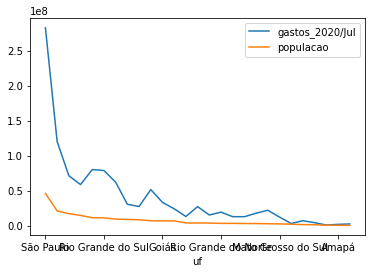

In [33]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]
#=====================Após a criação da função acima===================================================
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jul')
#======================================================================================================
#criando uma coluna de gastos com os valores em milhão para exemplo do plot
#A linha abaixo foi comentada após a criação da função insere_gastos_e_gasto_por_habitante_para
#gastos_e_populacao_recente['gastos'] = gastos_e_populacao_recente['2020/Jul']*1000000
gastos_e_populacao_recente[['gastos_2020/Jul', 'populacao']].plot()

Apesar de existir uma certa correlação entre gastos e população (quanto maior um, maior o outro) a comparação entre eles não tem sentido, uma vez que, gastos são valores monetários e a população é uma contagem, existem duas escalas sem relação, dois eixos de y diferentes. Isso é **horripilante** em termos de data visualization e permite que informações completamente equivocadas sejam repassadas. Em um primeiro momento podemos pensar que o estado de São Paulo tem um gasto incrivelmente mais alto comparado a Rio Grande do Sul, veremos se isso procede.

In [34]:
gastos_e_populacao_recente.loc[['Rio Grande do Sul', 'São Paulo']]

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,
Rio Grande do Sul,11422973,78.93,78929703.81,6.91
São Paulo,46289333,282.71,282709570.31,6.11


In [35]:
print('Rio Grande do Sul:',78929703.81/11422973)

Rio Grande do Sul: 6.909733902899009


In [36]:
print('São Paulo:',282709570.31/46289333)

São Paulo: 6.107445322446102


Temos que o gasto do RS foi de 6.90 por habitante e em SP de 6.10 por habitante, pode isso? Sim, pode! Se olharmos agora o gráfico acima com mais calma poderemos perceber que SP tem uma população de aproximada de 4 vezes comparada a do RS e os gastos de SP são de aproximadamente, também, de 4 vezes mais comparado ao Rio Grande do Sul, entretanto, no gráfico não conseguimos ver que São Paulo tem um gasto praticamente aproximado ao do Rio Grande do Sul por habitante.

In [37]:
#A linha abaixo foi comentada após a criação da função insere_gastos_e_gasto_por_habitante_para
#gastos_e_populacao_recente['gasto_por_habitante'] = gastos_e_populacao_recente['gastos'] / gastos_e_populacao_recente['populacao']
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul
uf,,,,
São Paulo,46289333,282.71,282709570.31,6.11
Minas Gerais,21331292,120.47,120467187.34,5.65
Rio de Janeiro,17366189,71.54,71540227.33,4.12
Bahia,14930634,58.90,58898100.40,3.94
Paraná,11516840,80.32,80320852.69,6.97


Podemos postar os dados relativo a gastos por habitante, dessa vez como gráfico de barras pois já vimos que por linha não teria sentido.

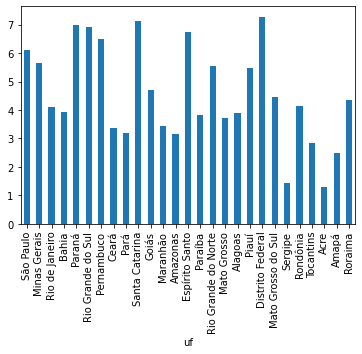

In [38]:
gastos_e_populacao_recente['gasto_por_habitante_2020/Jul'].plot(kind='bar')

E que tal ordenarmos esse gráfico? Resposta: Não.
Caso queiramos dizer qual é o estado que gasta mais por habitante, realmente, ordenar resolveria, porém, se deixarmos o gráfico dessa forma isso representa a ordem de *valor absoluto*, ou seja, o estado que mais gasta (SP) está gastando aproximadamente 6 reais por habitante e Roraima que é o estado que menos gasta está gastando aproximadamente 4.50 reais por pessoa, ou seja, nessa ordem ainda existe uma história sendo contada. Por isso mantemos esse gráfico. 

##Desafio 1: Ordenar por gasto por habitante e ordenar por habitantes.

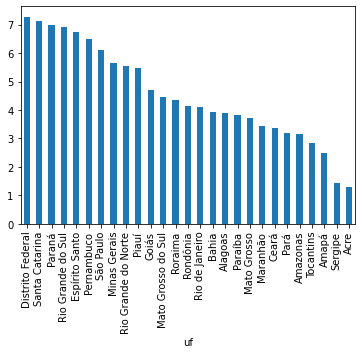

In [39]:
gasto_por_habitante_ordenado = gastos_e_populacao_recente['gasto_por_habitante_2020/Jul'].sort_values(ascending=False)
gasto_por_habitante_ordenado.plot(kind='bar')

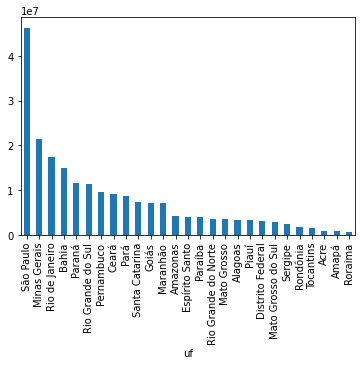

In [40]:
habitantes = gastos_e_populacao_recente['populacao'].sort_values(ascending=False)
habitantes.plot(kind='bar')

##Gráficos com Seaborn

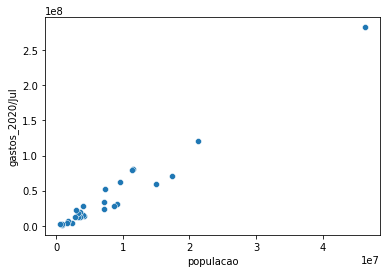

In [41]:
import seaborn as sns

sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gastos_2020/Jul')

O seaborn utiliza o matplotlib por trás de suas funcionalidades.

Então ele criou essa imagem com esse tamanho por padrão, a população crescente em dezenas de milhões e os gastos crescendo em centenas de milhões. Claro, é ruim visualizar esse gráfico com os eixos em 1e7 e 1e8, vamos rascunhar e chegaremos no gráfico que queremos. Um modo de melhorar é dividir por milhão.

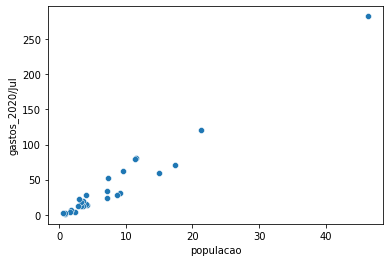

In [42]:
import seaborn as sns

sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos_2020/Jul')

Podemos observar que existe um ponto onde a população é muito grande e o gasto também.
Ademais, parece existir uma tendência (uma reta). Uma reta que aproxima os gastos em função da população. Vamos deixar esse gráfico mais quadrado para observarmos melhor essa reta.

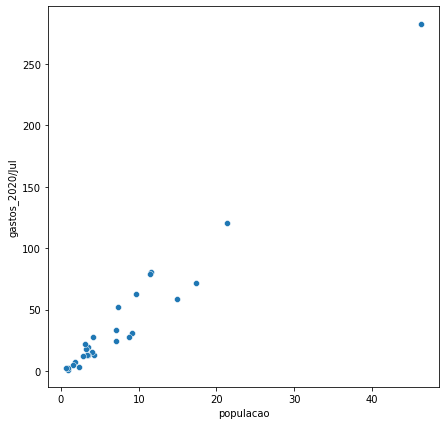

In [43]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos_2020/Jul')

Visualizando o gráfico de gasto por habitante.

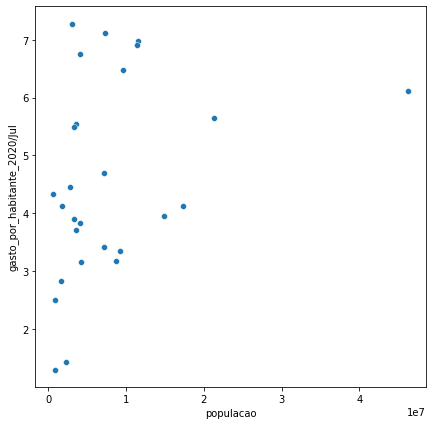

In [44]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao', y='gasto_por_habitante_2020/Jul')

Agora podemos observar valores muito espalhados, a medida que a população aumenta não necessariamente o gasto aumenta, não vemos  uma tendência.

##Super desafio 1: Fazer os últimos gráficos para o mês anterior a esse.

##Super desafio 2: Fazer os últimos gráfios com os dois dados no mesmo gráfico.

Como a estimativa do IBGE é a mesma para o mês anterior então podemos usar a mesma população. Precisamos então apenas incluir os dados para 2020/Jun, para isso, criaremos uma função acima da célula em que fizemos gastos_e_populacao_recente[2020/Jul], localizada logo após o índice Aula 2 - Proporcionalidades e Seaborn

In [45]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Jun')
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, '2020/Mai')
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos_2020/Jul,gasto_por_habitante_2020/Jul,gastos_2020/Jun,gasto_por_habitante_2020/Jun,gastos_2020/Mai,gasto_por_habitante_2020/Mai
uf,,,,,,,,
São Paulo,46289333,282.71,282709570.31,6.11,299060851.62,6.46,302857660.98,6.54
Minas Gerais,21331292,120.47,120467187.34,5.65,135977571.87,6.37,136867275.75,6.42
Rio de Janeiro,17366189,71.54,71540227.33,4.12,77604925.21,4.47,86281033.16,4.97
Bahia,14930634,58.90,58898100.40,3.94,65159300.63,4.36,61756775.71,4.14
Paraná,11516840,80.32,80320852.69,6.97,92901461.36,8.07,106103737.62,9.21


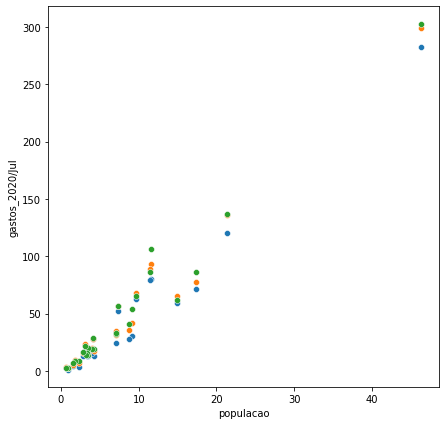

In [46]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos_2020/Jul')
sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos_2020/Jun')
sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao', y='gastos_2020/Mai')

##Desafio: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é, também, uma hipótese e que esses dados poderão sofrer alterações.

#Aula 3 - Ticks, escalas e formatação de imagens.

##Scatterplot

In [47]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172.83,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
Minas Gerais,70.30,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
Rio de Janeiro,44.12,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,59.07,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


Queremos agora fazer um gráfico, por exemplo, de São Paulo. Como fazemos se queremos plotar mês a mês e valor? Sendo que o mês são colunas e valores LINHAS?

Até o momento os gráficos foram plotados apenas se utilizando colunas, vejamos como prosseguir.

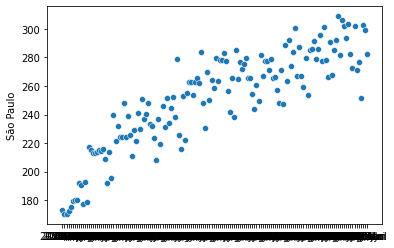

In [48]:
sns.scatterplot(x=ordenado_por_total.columns, y=ordenado_por_total.loc['São Paulo'])

Funciona usar o scatterplot sem um dataframe usando apenas duas séries, mas não fica muito legal em termos de uso. Dessa forma podemos usar uma matriz transposta transformando 'São Paulo' em coluna.

In [49]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


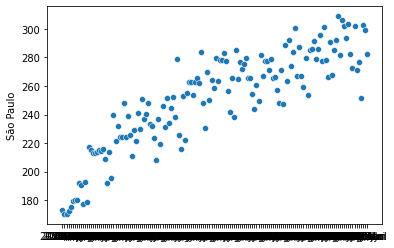

In [50]:
sns.scatterplot(data=mensal,x=mensal.index, y='São Paulo')

Obtemos a mesma informação mas utilizando o DataFrame. Mas de todo modo o gráfico ainda é ruim por si só, observe que os índices estão bagunçados impossibilitando a leitura. Veremos após o desafio outras formas de tratamento.

##Desafio 1: Faça o mesmo para seu estado.

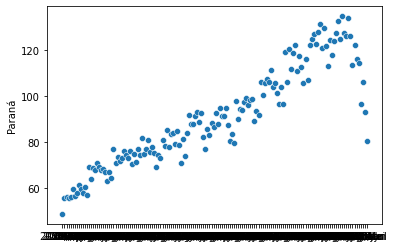

In [51]:
sns.scatterplot(data=mensal, x=mensal.index, y='Paraná')

##Lineplot

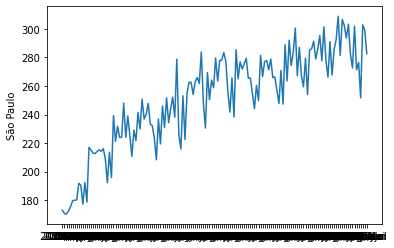

In [52]:
sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')

Nesse gráfico conseguimos observar sazonalidades. Mas agora sim vamos melhorar esse plot, retocando o gráfico.

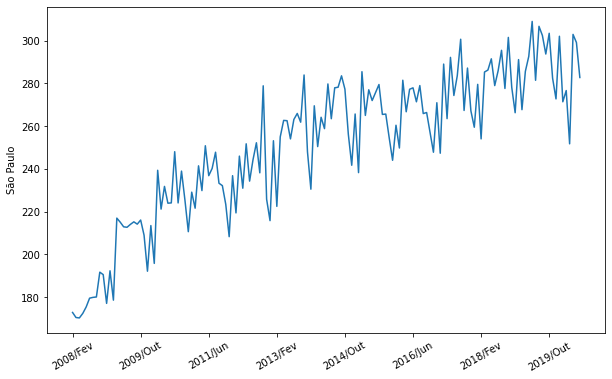

In [53]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
#Modifica os índices incluindo os principais ticks.
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

Utilizamos o construtor ticker.AutoLocator para colocar os principais pontos para os tickers do eixo x, entretanto, não necessariamente esse método é ótimo pois perdemos o controle do intervalo que é plotado. Desse modo fazemos o IndexLocator controlando isso informando a base (no caso será 12 para que seja de 12 em 12 meses) e o offset que informa de onde deve iniciar essa contagem. 

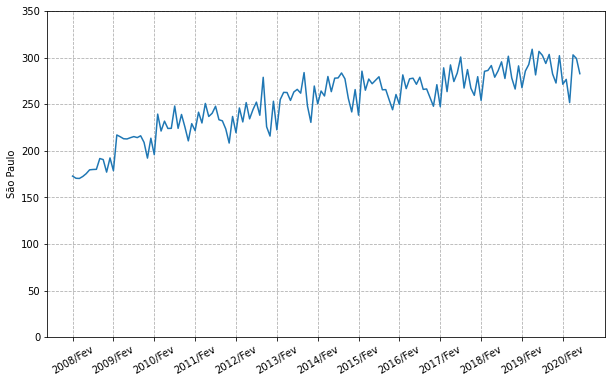

In [54]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
plt.ylim(0,350)
#Modifica os índices incluindo os principais ticks.
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(linestyle='--')
plt.show()

Fazendo esses ajustes percebemos como o Matplotlib é o que roda por baixo dos panos do Seaborn.

##Desafio 2: Formatar o eixo y deixando os valores em milhões, colocar um título principal e nos eixos e, também, alterar a fonte desses.

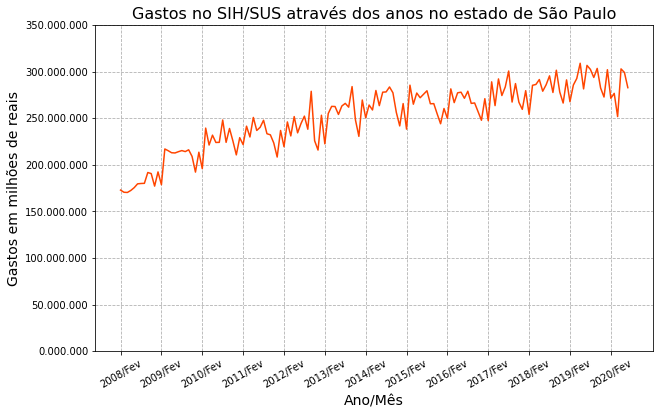

In [59]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo', color='orangered')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
plt.ylim(0,350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.title('Gastos no SIH/SUS através dos anos no estado de São Paulo', fontsize=16)
plt.xlabel('Ano/Mês', fontsize=14)
plt.ylabel('Gastos em milhões de reais', fontsize=14)
plt.grid(linestyle='--')
plt.show()

#Aula 4 - Trabalhando com DateTime e Melt

Até o momento fizemos diversas análises e como podemos notar os dados estão em ano/mês e não dia mês e isso nos gera um problema, existe uma dificuldade maior em filtrarmos dados de maneira intervalar. Como tratarmos esses dados como data?

##Transformando strings em data

Queremos trabalhar com formatação em dia. O caminho para isso é trabalhar com o pacote DateTime.

In [61]:
from datetime import date

date.today()

datetime.date(2020, 11, 27)

In [62]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008/Mar,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/Abr,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/Mai,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/Jun,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


O índice do mensal são das datas

In [63]:
mensal.index

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2019/Out', '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar',
       '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul'],
      dtype='object', length=150)

In [78]:
meses = {"Jan": 1,
         "Fev": 2,
         "Mar": 3,
         "Abr": 4,
         "Mai": 5,
         "Jun": 6,
         "Jul": 7,
         "Ago": 8,
         "Set": 9,
         "Out": 10,
         "Nov": 11,
         "Dez": 12,}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = (ano_mes[5:])
  mes_numero: int = meses[mes]
  return date(ano,mes_numero,1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Agora plotaremos novamente um dos gráficos da aula anterior, entretanto, na versão "feia" dele

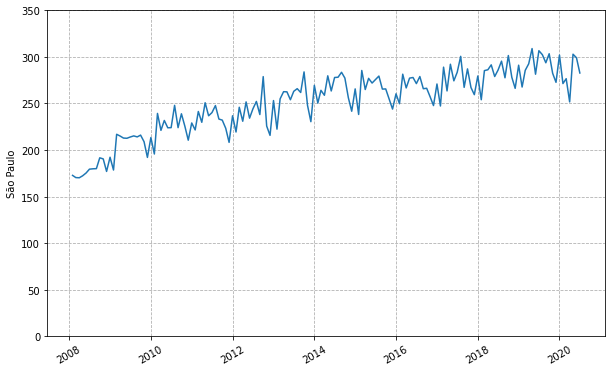

In [79]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(linestyle='--')
plt.show()

Perceba que o seaborn já colocou a idenficação do eixo x iniciando por janeiro. Vejamos o info agora.

In [80]:
mensal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2008-02-01 to 2020-07-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   São Paulo            150 non-null    float64
 1   Minas Gerais         150 non-null    float64
 2   Paraná               150 non-null    float64
 3   Rio Grande do Sul    150 non-null    float64
 4   Rio de Janeiro       150 non-null    float64
 5   Bahia                150 non-null    float64
 6   Pernambuco           150 non-null    float64
 7   Santa Catarina       150 non-null    float64
 8   Ceará                150 non-null    float64
 9   Goiás                150 non-null    float64
 10  Pará                 150 non-null    float64
 11  Maranhão             150 non-null    float64
 12  Espírito Santo       150 non-null    float64
 13  Rio Grande do Norte  150 non-null    float64
 14  Paraíba              150 non-null    float64
 15  Distrito Federal     150 non-

Vemos que o índice é reconhecido no formato de data intervalar 2008-02-01 a 2020-07-01. Isso faz com que as proprias bibliotecas usadas fiquem mais "inteligentes" pois antes elas tinham que lidar com uma string e agora já trabalha com a data diretamente.

##Manipulação de dados com Melt

Vamos fazer novamente o plot do gráfico porém com dois valores como feito em aulas anteriores, notaremos problemas:
- eixos.
- legenda.
- sério mesmo? Copy e paste das linhas do gráfico?

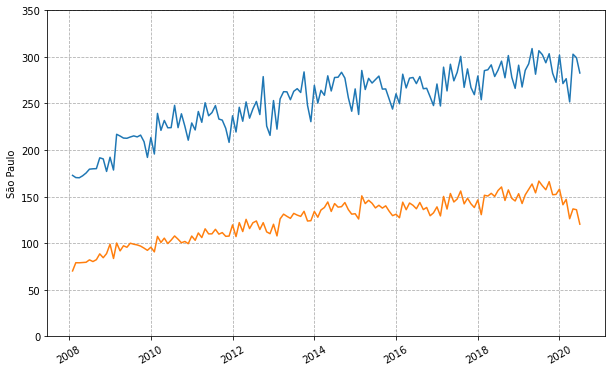

In [81]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax = sns.lineplot(data=mensal, x=mensal.index, y='Minas Gerais')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(linestyle='--')
plt.show()

E se quisermos representar a tabela mensal com todos os dados? Todos os Estados?

In [82]:
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42


Queremos deixar a tabela do seguinte modo:

```
MES      VALOR   ESTADO
2008-03  170.48  Sao Paulo
2008-03   79.12  Minas Gerais
...
```

In [84]:
#Retirando indice e transformando em coluna
mensal.reset_index()

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,172.83,70.30,48.86,45.90,44.12,33.41,26.22,24.41,27.64,18.15,20.13,13.45,10.03,9.11,10.87,10.22,8.28,9.71,8.11,7.93,7.93,4.64,5.05,1.94,1.74,0.77,1.28
1,2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2,2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
3,2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
4,2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2020-03-01,276.61,147.08,114.48,84.65,73.59,70.34,59.63,56.71,46.40,34.56,34.75,28.83,26.56,20.94,17.61,19.41,17.36,15.32,16.00,14.44,14.77,9.19,7.03,7.17,2.86,2.81,2.29
146,2020-04-01,251.70,126.33,96.73,76.29,68.16,59.11,53.84,51.18,43.47,27.50,28.71,23.94,23.74,17.32,15.39,18.12,15.65,11.88,14.24,11.94,16.33,8.40,6.20,7.42,2.47,2.30,1.77
147,2020-05-01,302.86,136.87,106.10,86.08,86.28,61.76,65.42,56.84,54.20,31.87,41.25,32.98,28.61,19.92,18.97,21.44,16.70,14.18,15.25,13.98,19.44,8.45,6.73,8.58,2.38,2.91,2.70
148,2020-06-01,299.06,135.98,92.90,89.02,77.60,65.16,68.15,56.50,42.15,34.44,35.40,31.13,27.45,20.22,19.67,23.48,15.84,15.38,14.28,14.59,17.51,6.71,5.02,9.19,2.20,3.22,2.70


In [87]:
#"Derretendo as colunas, quebrando para que se tornem linhas"
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['mes', 'uf', 'gasto'] 

In [88]:
mensal_aberto.head()  

,mes,uf,gasto
0,2008-02-01,São Paulo,172.83
1,2008-03-01,São Paulo,170.48
2,2008-04-01,São Paulo,170.28
3,2008-05-01,São Paulo,172.40
4,2008-06-01,São Paulo,175.42


##Desafio: Voltar atrás... Partindo do `mensal_aberto` chegar no `mensal`.

In [101]:
mensal_reverso = mensal_aberto.pivot(index='mes', columns='uf')
mensal_reverso.columns = ['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá']
mensal_reverso.index.rename('Unidade da Federação', inplace=True)
mensal_reverso.head() 

,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1.74,8.11,1.28,7.93,33.41,27.64,10.22,10.03,18.15,13.45,7.93,8.28,70.30,48.86,10.87,20.13,26.22,9.71,9.11,45.90,44.12,1.94,0.77,24.41,4.64,172.83,5.05
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40


Retornando para o gráfico acima.

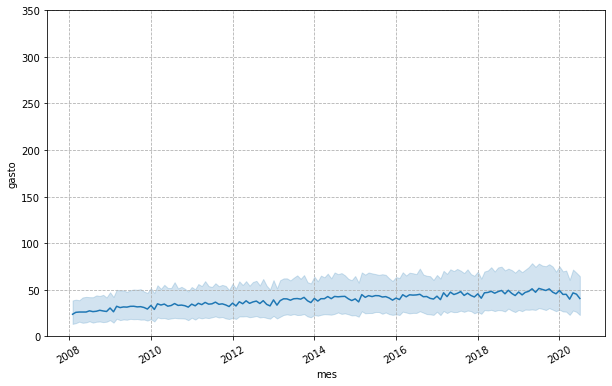

In [102]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x='mes', y='gasto')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(linestyle='--')
plt.show()

Mas ele não deveria fazer 27 linhas? **Não**, pois não pedimos para agrupar. O que ele está fazendo então? A Linha azul é o *valor médio* e a faixa é o *intervalo de confiança*. 
Mas não precisamos disso, afinal, nós temos os valores e não precisamos estima-los, então o que fazer? Agrupamos por uf, temos várias formas de fazer isso, uma delas é incluir o parâmetro 'hue' ao gráfico.

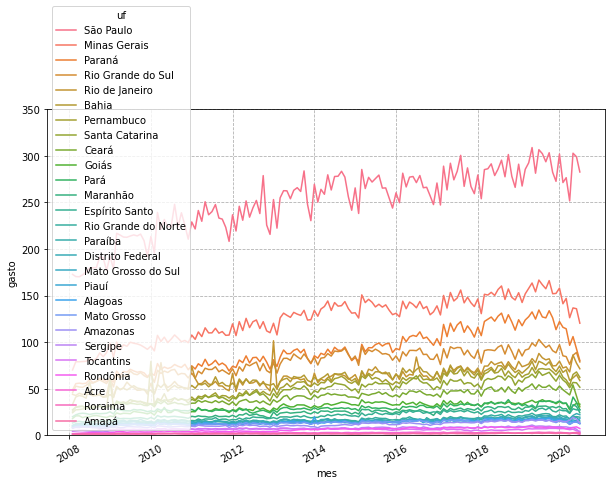

In [103]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x='mes', y='gasto', hue='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}.000.000")) #transformando eixo das ordenadas para valores de ponto flutuante
plt.xticks(rotation=30)
plt.ylim(0,350)
plt.grid(linestyle='--')
plt.show()

Agora temos 27 linhas diferentes, ou seja, os 27 estados.


##Desafio: 
- muitos estados, escolha os estados.
- palete de cores: https://seaborn.pydata.org/tutorial/color_palettes.html
- Posição da legenda
- Título e títulos dos eixos.